In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

from optimize import optimize
from tqdm import tqdm

In [3]:
def f04(x):
    time.sleep(0.05)
    return -(16*x**2 - 24*x + 5)*np.exp(-x)

def f05(x):
    time.sleep(0.05)
    return -(1.4 - 3*x)*np.sin(18*x)

def f09(x):
    time.sleep(0.05)
    return np.sin(x) + np.sin(2/3 * x)

def f10(x):
    time.sleep(0.05)
    return -x*np.sin(x)

def f11(x):
    time.sleep(0.05)
    return 2*np.cos(x) + np.cos(2*x)

In [4]:
def plot_benchmark(f, a, b, methods, true_min, eps=1e-8, max_iter=20):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8), sharey=True)

    for method in methods:
        x_min, log = optimize(f, a, b, eps=eps, max_iter=max_iter, method=method, true_min=true_min)

        ax1.plot(log.iters, np.log(log.err), label=f"{method}: {round(x_min, 6)}, iters: {log.iters[-1]}")
        ax2.plot(log.time, np.log(log.err), label=f"{method}: {round(x_min, 6)}, iters: {log.iters[-1]}")

    fig.suptitle("Rate of absolute error convergence", fontsize=18)
    ax1.set_xlabel("iteration", fontsize=12)
    ax1.set_ylabel("log of absolute error", fontsize=12)
    ax2.set_xlabel("time (sec)", fontsize=12)
    ax1.legend()
    
def plot_min_pred(f, a, b, methods, eps=1e-8, max_iter=20):
    dots = np.linspace(a, b, 1000)
    fdots = f(dots)
    
    plt.figure(figsize=(8, 6))
    # ctr-c ctr-v opa!
    for method in methods:
        x_min = optimize(f, a, b, eps=eps, max_iter=max_iter, method=method)
        
        plt.scatter(x_min, f(x_min), label=f"{method}")
        
    plt.plot(dots, fdots)
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.legend()

# Графики сходимости

Для реализации я выбрал несколько несложных алгоритмов и один чуть сложнее - алгоритм Брента. В любом случае, чтобы понять Брента нужно прежде реализовать метод золотого сечения и метод парабол, поэтому для них я также построил графики. Самым простым бейзлайном я решил взять метод троичного поиска, основанный на аналогичной золотому сечению идее, только сегменты разбиваются на три отрезка и минимум ищется в каких-то следующих двух третях. Я выбрал 5 функций для теста, некоторые из них кажутся простыми, на отрезке имея только однозначный минимум, тогда как в остальных есть несколько локальных минимумов. Все они (кажется, но определений разных много), тем не менее, унимодальны хотя бы в окрестности локального минимума (в таком определении смысле не много, но оно намекает, что наш алгоритм уж там точно должен найти локальный минимум). Графики рисовал в matplotlib т.к. привычнее, но надеюсь в следующем дз уже использовать plotly.

In [5]:
methods = ["ternary", "golden", "parabola", "brent"]

## Problem04

Первая функция простая и точно унимодальная. Все алгоритмы с таким справились, разница лишь в последних знаках. 

<tr>
    <td> <img src="gifs/problemf04brent.gif" width="480" height="280"/> </td>
    <td> <img src="gifs/problemf04golden.gif" width="480" height="280"/> </td>
</tr>

Методы парабол оказался самым точным, сойдясь до последнего требуемого знака. На графике по времени видно различие в скорости (я добавил sleep(.05) в оракула), т.к. методы парабол и Брента написаны мной только с одним обращением к оракулу на каждой итерации, тогда как для золотого сечения и троичного поиска оракул вызывается дважды на каждой итерации (это можно легко поправить, но бейзлайн же!). Меня, признаюсь, слегка расстраивает, что все методы потратили на такую проблему по ~20 итераций. По гифке видно, что Брент сходится на несколько больших шагов, после чего почти не двигается. Есть гипотеза, что у меня не совсем правильное правило сходимости, когда стоит останавливать алгоритм. 

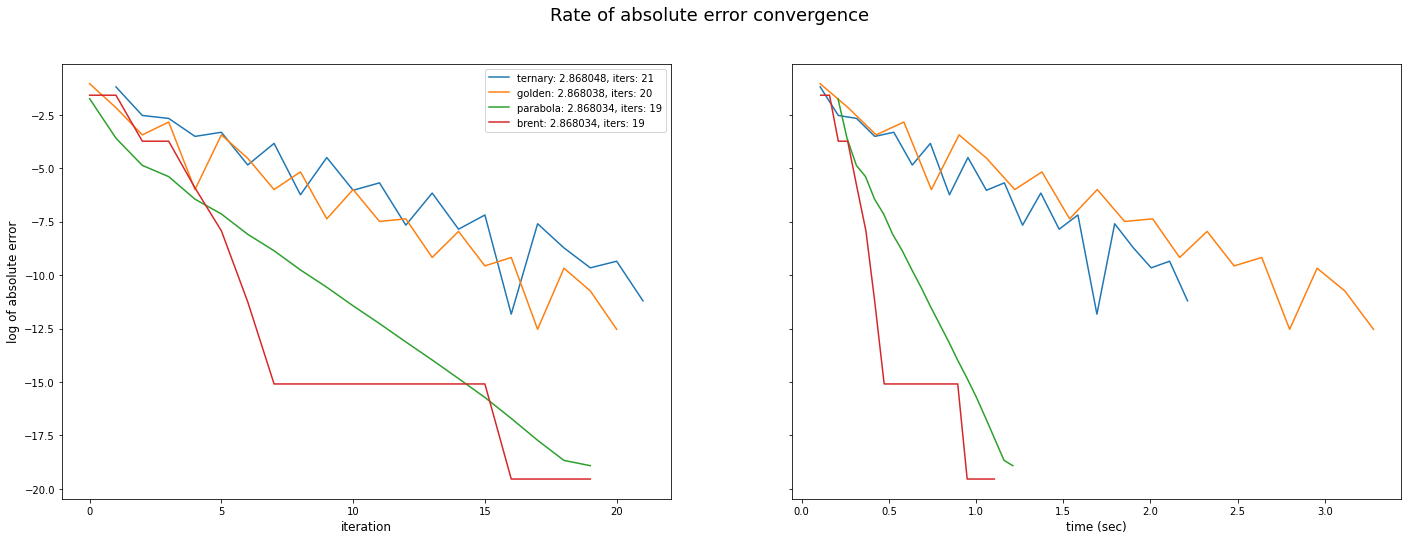

In [6]:
plot_benchmark(f04, 1.9, 3.9, methods=methods, true_min=2.868034)

## Problem05

На этой функции все методы сошлись в локальный минимум. Интересно, что и золотое сечение и Брент из одного локального минимума сошлись в локальный минимум получше.

<tr>
    <td> <img src="gifs/problemf05brent.gif" width="480" height="280"/> </td>
    <td> <img src="gifs/problemf05golden.gif" width="480" height="280"/> </td>
</tr>

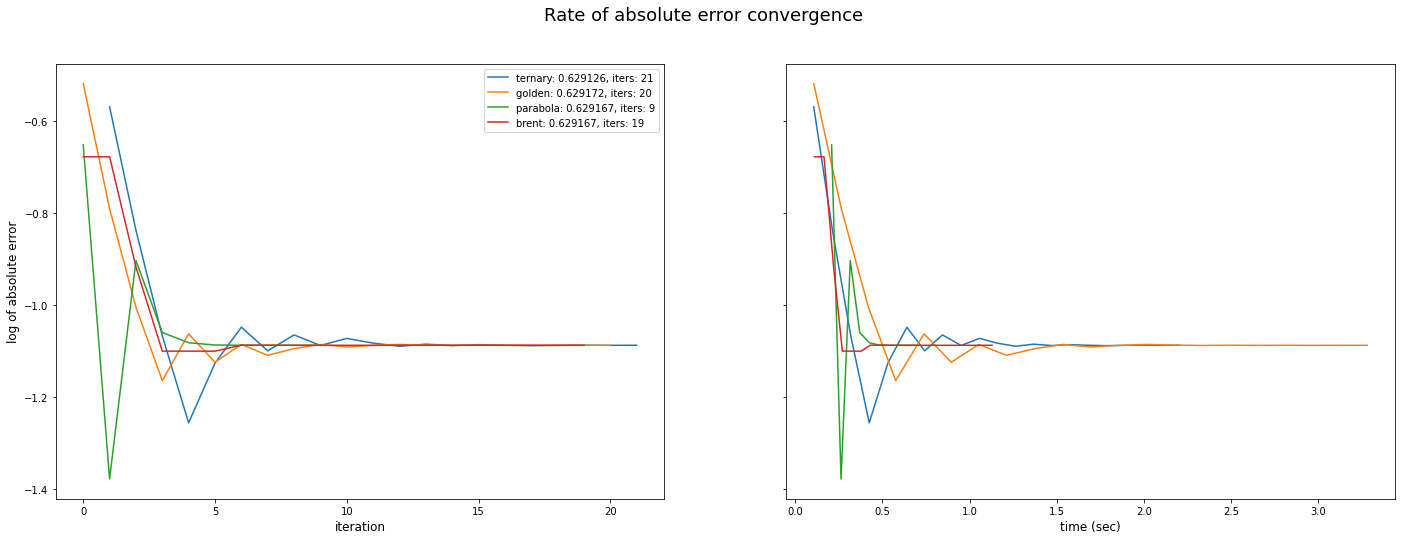

In [21]:
plot_benchmark(f05, 0, 1.2, methods=methods, true_min=0.96609)

## Problem09

Функция похожа на прошлую, но с другим стартовым интервалом. Здесь видно, что сходимость алгоритма сильно зависит от изначального интервала и того, как выбираются серединные точки для алгоритмов ($x, w, v$ для Брента, $\frac{a + b}{2}$ для золотого сечения). Брент сошелся в ближайший к нему локальный минимум т.к. буквально попал в него с самого начала.  

<tr>
    <td> <img src="gifs/problemf09brent.gif" width="480" height="280"/> </td>
    <td> <img src="gifs/problemf09golden.gif" width="480" height="280"/> </td>
</tr>

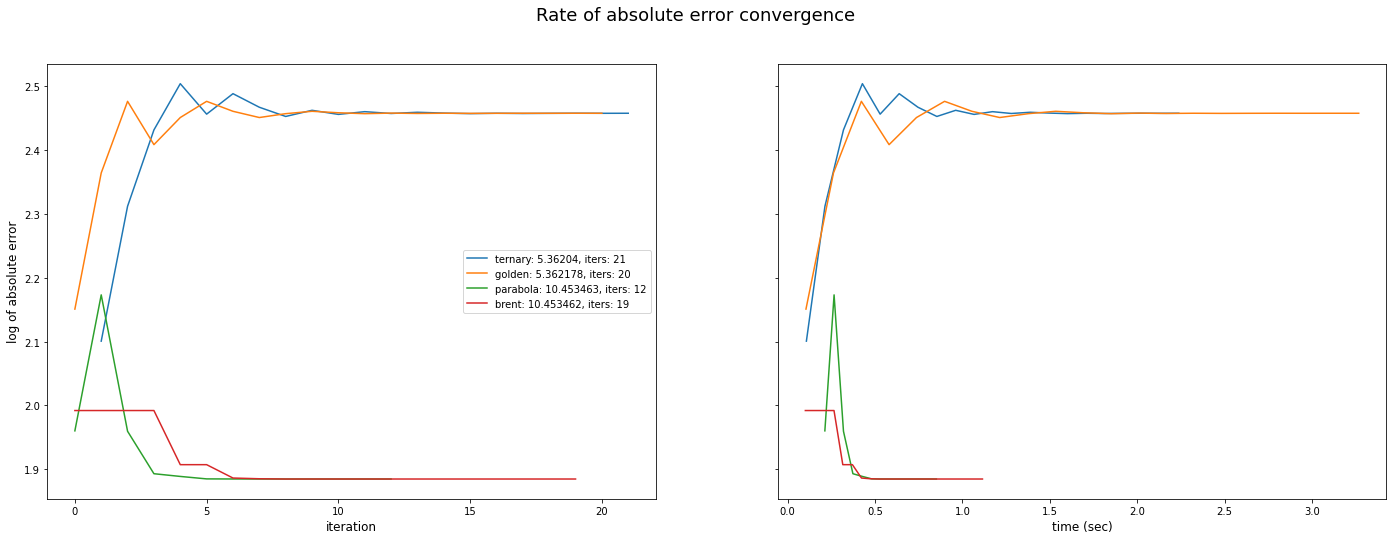

In [22]:
plot_benchmark(f09, 3.1, 20.4, methods=methods, true_min=17.039)

## Problem10

Еще одна простая функция, на которой видно, что метод парабол и Брента сходится гораздо быстрее, чем золотое сечение. Думаю, что метод Брента должен был остановиться примерно тогда же, когда и метод парабол. Вероятно, я все же ошибся с критерием остановки (хотя я взял стандартный из книжки с numerical recipes).

<tr>
    <td> <img src="gifs/problemf10brent.gif" width="480" height="280"/> </td>
    <td> <img src="gifs/problemf10golden.gif" width="480" height="280"/> </td>
</tr>

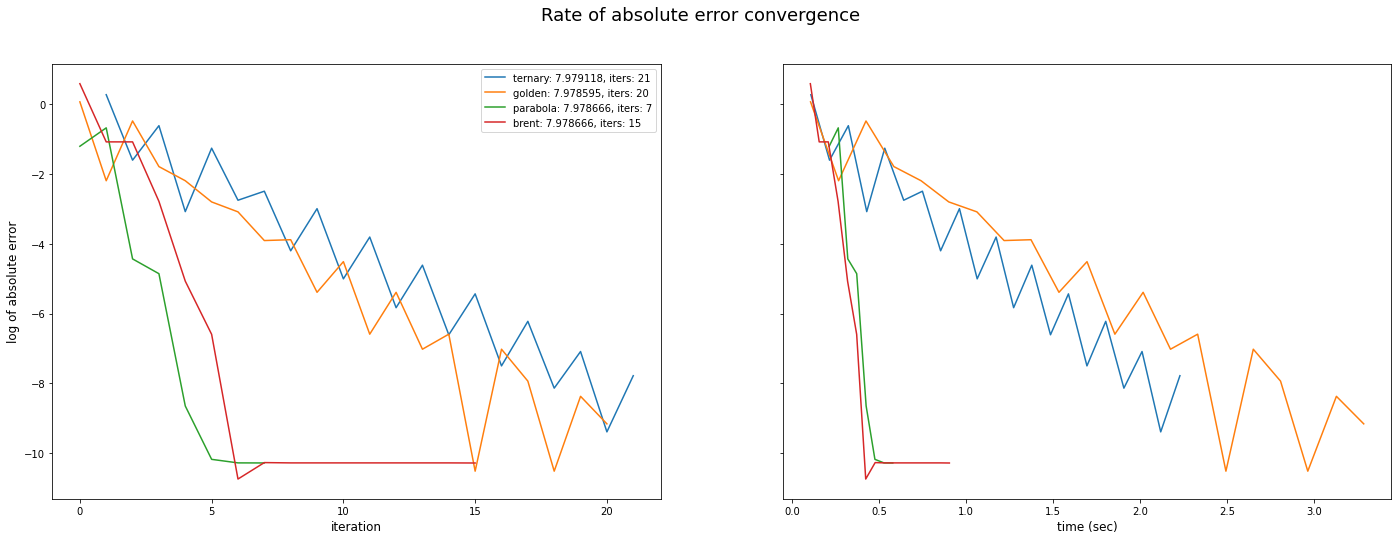

In [25]:
plot_benchmark(f10, 0, 10, methods=methods, true_min=7.9787)

## Problem11

Просто интересный пример, т.к. метод парабол сошелся в глобальный минимум (правда, тут разница не очень большая).

<tr>
    <td> <img src="gifs/problemf11brent.gif" width="480" height="280"/> </td>
    <td> <img src="gifs/problemf11golden.gif" width="480" height="280"/> </td>
</tr>

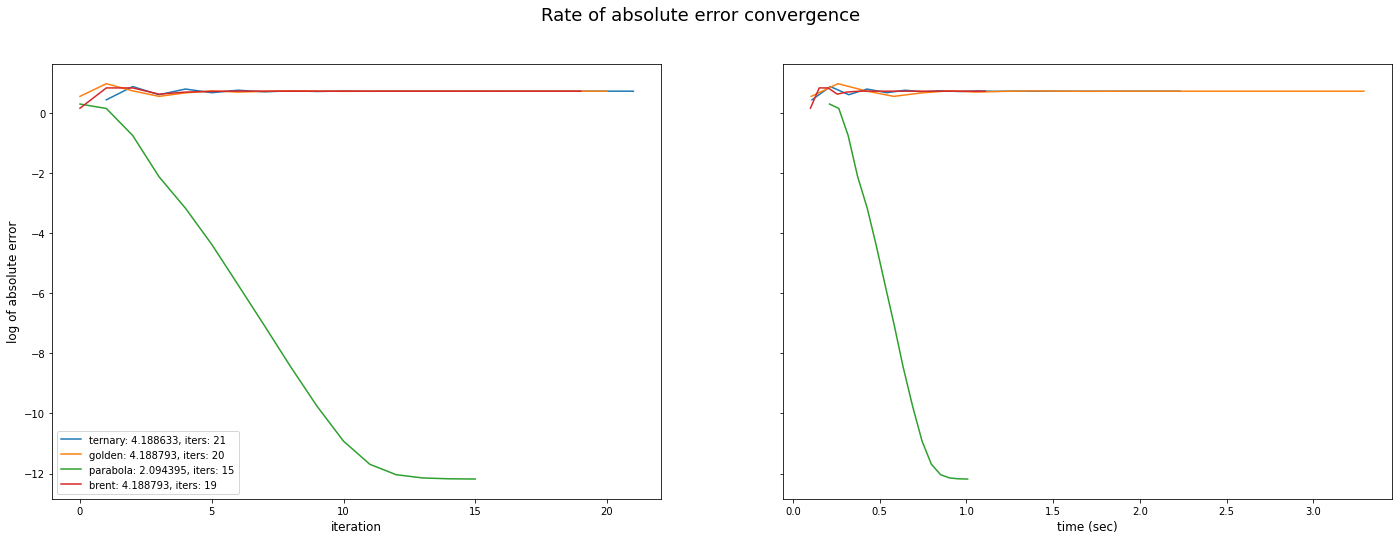

In [11]:
plot_benchmark(f11, -np.pi/2, 2*np.pi, methods=methods, true_min=2.09439)

## Выводы

По графикам видно, что метод Брента в целом оказывается точнее и по идее должен даже быстрее сходится (он так и делает), но почему-то останавливается не сразу. Метод парабол часто сходится к похожему результату гораздо быстрее, что вызывает подозрения т.к. метод Брента должен работать не хуже.

# Just fun

In [36]:
import matplotlib
from celluloid import Camera

matplotlib.use('Agg')

def save_animation(f, a, b, method, eps=1e-8, max_iter=20):
    x_min, log = optimize(f, a, b, eps, max_iter, method=method, true_min=0.0)

    points = np.linspace(a, b, 600)
    fpoints = f(points)

    fig = plt.figure(figsize=(8, 6), dpi=200);    
    camera = Camera(fig)

    for i in range(len(log.iter_min)):
        x, fx = log.iter_min[i]
        
        plt.plot(points, fpoints, color="blue");
        plt.scatter(x, fx, color="red");
        plt.xlabel("$x$")
        plt.ylabel("$f(x)$")
        plt.title(f"Problem{f.__name__[1:]}: {method}")
        camera.snap();
  
    animation = camera.animate(repeat_delay=2.5, blit=False);
    animation.save(f'gifs/problem{f.__name__}{method}.gif', writer="imagemagick",
                   dpi=fig.dpi, fps=15, savefig_kwargs={'pad_inches': "tight"});

In [37]:
save_animation(f04, 1.9, 3.9, "brent")
save_animation(f04, 1.9, 3.9, "golden")

In [38]:
save_animation(f05, 0, 1.2, "brent")
save_animation(f05, 0, 1.2, "golden")

In [39]:
save_animation(f09, 3.1, 20.4, "brent")
save_animation(f09, 3.1, 20.4, "golden")

In [40]:
save_animation(f10, 0, 10, "brent")
save_animation(f10, 0, 10, "golden")

In [41]:
save_animation(f11, -np.pi/2, 2*np.pi, "brent")
save_animation(f11, -np.pi/2, 2*np.pi, "golden")